# Titanic Survival Prediction
<hr>

**Download data**

In [4]:
! gdown 1SFWQ7Zi83Gff-RVrlHj0z4Llm1Nq4BBA

Downloading...
From: https://drive.google.com/uc?id=1SFWQ7Zi83Gff-RVrlHj0z4Llm1Nq4BBA
To: /content/titanic_modified_dataset.csv
100% 25.9k/25.9k [00:00<00:00, 66.6MB/s]


**Import libraries**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Import data**

In [7]:
dataset_path = "./titanic_modified_dataset.csv"
df = pd.read_csv(
    dataset_path,
    index_col="PassengerId"
)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
 7   Title     891 non-null    int64  
 8   Survived  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.6 KB


In [8]:
df.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,0.359147,0.936027,0.383838
std,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.638707,1.725341,0.486592
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,2.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,16.000000,1.000000


In [10]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0


In [27]:
dataset_arr = df.to_numpy().astype(np.float64)
X,y = dataset_arr[:,:-1], dataset_arr[:,-1]

In [29]:
intercept = np.ones((X.shape[0],1))
X_b = np.hstack((intercept,X))

**Distribute train, validation, test dataset**

In [30]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train,X_val,y_train,y_val = train_test_split(
    X_b,y,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)
X_train,X_test,y_train,y_test = train_test_split(
    X_train,y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

**Normalize data**

In [31]:
# Scale data
normalizer = StandardScaler()
X_train[:,1:] = normalizer.fit_transform(X_train[:,1:])
X_val[:,1:] = normalizer.transform(X_val[:,1:])
X_test[:,1:] = normalizer.transform(X_test[:,1:])

**Operating functions**

In [32]:
def sigmoid(z):
  return 1/(1+np.exp(-z))
def predict(X,theta):
  return sigmoid(X.dot(theta))
def compute_loss(y_hat,y):
  y_hat = np.clip(y_hat,1e-7,1 - 1e-7)
  return (-y*np.log(y_hat)-(1-y)*np.log(1-y_hat)).mean()
def compute_gradient(X,y,y_hat):
  return np.dot(X.T,(y_hat-y))/y.shape[0]
def update_theta(theta,gradient,lr):
  return theta- lr*gradient

In [33]:
def compute_accuracy(X,y,theta):
  y_hat = predict(X,theta).round()
  acc = (y_hat == y).mean()
  return acc

**Train**
<hr>

In [39]:
lr = 0.01
epochs = 100
batch_size=16
np.random.seed(random_state)
theta = np.random.uniform(size = X_train.shape[1])
train_accs = []
train_losses = []
val_accs = []
val_losses = []
for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0,X_train.shape[0],batch_size):
      X_i = X_train[i:i+batch_size]
      y_i = y_train[i:i+batch_size]
      y_hat = predict(X_i,theta)

      train_loss = compute_loss(y_hat,y_i)
      gradient = compute_gradient(X_i,y_i,y_hat)
      theta = update_theta(theta, gradient,lr)
      train_batch_losses.append(train_loss)

      train_acc = compute_accuracy(X_train,y_train,theta)
      train_batch_accs.append(train_acc)

      y_val_hat = predict(X_val,theta)
      val_loss = compute_loss(y_val_hat,y_val)
      val_batch_losses.append(val_loss)

      val_acc = compute_accuracy(X_val,y_val,theta)
      val_batch_accs.append(val_acc)
    train_batch_loss = sum(train_batch_losses)/len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses)/len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs)/len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs)/len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)
    print(f'\nEPOCH {epoch+1}:\tTraining loss : {train_batch_loss:.3f}\tValidation loss:{val_batch_loss:.3f}')


EPOCH 1:	Training loss : 0.703	Validation loss:0.599

EPOCH 2:	Training loss : 0.670	Validation loss:0.582

EPOCH 3:	Training loss : 0.640	Validation loss:0.567

EPOCH 4:	Training loss : 0.614	Validation loss:0.555

EPOCH 5:	Training loss : 0.592	Validation loss:0.544

EPOCH 6:	Training loss : 0.572	Validation loss:0.535

EPOCH 7:	Training loss : 0.554	Validation loss:0.528

EPOCH 8:	Training loss : 0.539	Validation loss:0.522

EPOCH 9:	Training loss : 0.526	Validation loss:0.517

EPOCH 10:	Training loss : 0.514	Validation loss:0.513

EPOCH 11:	Training loss : 0.504	Validation loss:0.509

EPOCH 12:	Training loss : 0.495	Validation loss:0.507

EPOCH 13:	Training loss : 0.487	Validation loss:0.505

EPOCH 14:	Training loss : 0.480	Validation loss:0.503

EPOCH 15:	Training loss : 0.474	Validation loss:0.502

EPOCH 16:	Training loss : 0.468	Validation loss:0.501

EPOCH 17:	Training loss : 0.463	Validation loss:0.500

EPOCH 18:	Training loss : 0.459	Validation loss:0.500

EPOCH 19:	Training

**Visual**

Text(0.5, 1.0, 'Validation Accuracy')

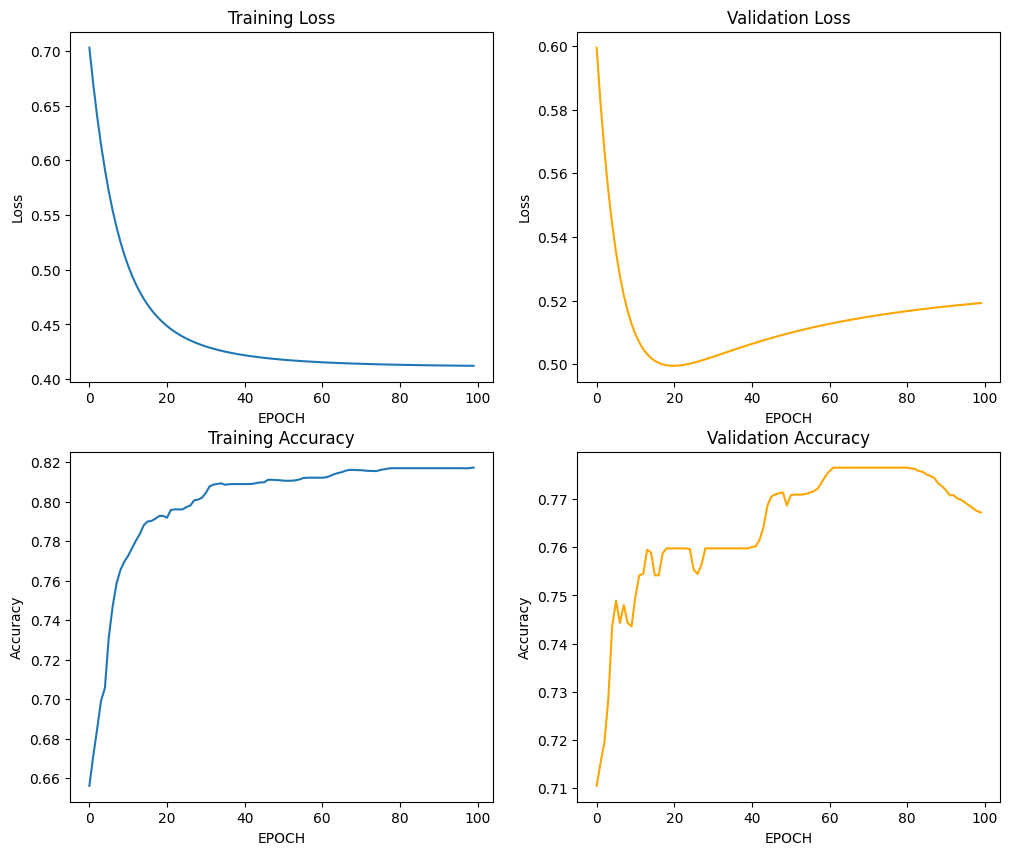

In [41]:
fig,ax = plt.subplots(2,2,figsize=(12,10))
ax[0,0].plot(train_losses)
ax[0,0].set(xlabel="EPOCH",ylabel="Loss")
ax[0,0].set_title("Training Loss")

ax[0,1].plot(val_losses,"orange")
ax[0,1].set(xlabel="EPOCH",ylabel="Loss")
ax[0,1].set_title("Validation Loss")

ax[1,0].plot(train_accs)
ax[1,0].set(xlabel="EPOCH",ylabel="Accuracy")
ax[1,0].set_title("Training Accuracy")

ax[1,1].plot(val_accs,"orange")
ax[1,1].set(xlabel="EPOCH",ylabel="Accuracy")
ax[1,1].set_title("Validation Accuracy")

**Evaluation**

In [42]:
val_set_acc = compute_accuracy(X_val,y_val,theta)
test_set_acc = compute_accuracy(X_test,y_test,theta)
print("Evaulation on validation and test set:")
print(f"Accuracy: {val_set_acc}")
print(f"Accuracy: {test_set_acc}")

Evaulation on validation and test set:
Accuracy: 0.770949720670391
Accuracy: 0.7752808988764045


# Twitter Sentiment Analysis
<hr>

**Download data**

In [45]:
!gdown 1dANzxlEjeCEbveFOWWqzSG-niVx-vCgK

Downloading...
From: https://drive.google.com/uc?id=1dANzxlEjeCEbveFOWWqzSG-niVx-vCgK
To: /content/sentiment_analysis.csv
100% 1.10M/1.10M [00:00<00:00, 116MB/s]


**Import libraries**

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
import re
import nltk
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import TweetTokenizer
from collections import defaultdict

**Import data**

In [47]:
dataset_path = 'sentiment_analysis.csv'
df = pd.read_csv(dataset_path,index_col="id")

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7920 entries, 1 to 7920
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   7920 non-null   int64 
 1   tweet   7920 non-null   object
dtypes: int64(1), object(1)
memory usage: 185.6+ KB


In [50]:
df.head()

,label,tweet
id,,
1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
2,0,Finally a transparant silicon case ^^ Thanks t...
3,0,We love this! Would you go? #talk #makememorie...
4,0,I'm wired I know I'm George I was made that wa...
5,1,What amazing service! Apple won't even talk to...


**Preprocess data**

In [52]:
def text_normalize(text):
  # Retweet old acronym "RT" removal
  text = re.sub(r'^RT[\s]+',"",text)

  # Hyperlinks removal
  text = re.sub(r'https?:\/\/.*[\r\n]*',"",text)

  # Hashtags removal
  text = re.sub(r'#',"",text)

  # Punctuation removal
  text = re.sub(r'[^\w\s]',"",text)

  # Tokenization
  tokenizer = TweetTokenizer(
      preserve_case=False,
      strip_handles=True,
      reduce_len=True
  )
  text_tokens = tokenizer.tokenize(text)

  return text_tokens

In [57]:
def get_freqs(df):
  freqs = defaultdict(lambda:0)
  for idx,row in df.iterrows():
    tweet = row['tweet']
    label = row['label']

    tokens = text_normalize(tweet)
    for token in tokens:
      pair = (token,label)
      freqs[pair] +=1
    return freqs

In [54]:
def get_feature(text,freqs):
  tokens =text_normalize(text)
  X= np.zeros(3)
  X[0] = 1
  for token in tokens:
    X[1] += freqs[(token,0)]
    X[2] += freqs[(token,1)]
  return X

In [58]:
X= []
y = []
freqs = get_freqs(df)
for idx,row in df.iterrows():
  tweet = row['tweet']
  label = row['label']

  X_i = get_feature(tweet,freqs)
  X.append(X_i)
  y.append(label)
X = np.array(X)
y = np.array(y)

**Distribute train, validation, test dataset**

In [63]:
val_size = 0.2
test_size = 0.125
random_state =2
is_shuffle = True

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = val_size,random_state = random_state,shuffle=is_shuffle)
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size = test_size,random_state = random_state,shuffle=is_shuffle)

**Normalize data**

In [64]:
normalizer = StandardScaler()
X_train[:,1:] = normalizer.fit_transform(X_train[:,1:])
X_val[:,1:] = normalizer.transform(X_val[:,1:])
X_test[:,1:] = normalizer.transform(X_test[:,1:])


**Logistic regression operating funcions**

In [71]:
def sigmoid(z):
  return 1/(1+np.exp(-z))
def predict(X,theta):
  return sigmoid(X.dot(theta))
def compute_loss(y_hat,y):
  y_hat = np.clip(y_hat,1e-7,1 - 1e-7)
  return (-y*np.log(y_hat)-(1-y)*np.log(1-y_hat)).mean()
def compute_gradient(X,y,y_hat):
  return np.dot(X.T,(y_hat-y))/y.size
def update_theta(theta,gradient,lr):
  return theta- lr*gradient

In [66]:
def compute_accuracy(X,y,theta):
  y_hat = predict(X,theta).round()
  acc = (y_hat == y).mean()
  return acc

**Train**
<hr>

In [68]:
lr = 0.01
epochs = 200
batch_size = 128

np.random.seed(random_state)
theta = np.random.uniform(size=X_train.shape[1])
train_accs = []
train_losses = []
val_accs = []
val_losses = []
for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0,X_train.shape[0],batch_size):
      X_i = X_train[i:i+batch_size]
      y_i = y_train[i:i+batch_size]
      y_hat = predict(X_i,theta)

      train_loss = compute_loss(y_hat,y_i)
      gradient = compute_gradient(X_i,y_i,y_hat)
      theta = update_theta(theta, gradient,lr)
      train_batch_losses.append(train_loss)

      train_acc = compute_accuracy(X_train,y_train,theta)
      train_batch_accs.append(train_acc)

      y_val_hat = predict(X_val,theta)
      val_loss = compute_loss(y_val_hat,y_val)
      val_batch_losses.append(val_loss)

      val_acc = compute_accuracy(X_val,y_val,theta)
      val_batch_accs.append(val_acc)
    train_batch_loss = sum(train_batch_losses)/len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses)/len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs)/len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs)/len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)
    print(f'\nEPOCH {epoch+1}:\tTraining loss : {train_batch_loss:.3f}\tValidation loss:{val_batch_loss:.3f}')


EPOCH 1:	Training loss : 0.798	Validation loss:0.796

EPOCH 2:	Training loss : 0.754	Validation loss:0.752

EPOCH 3:	Training loss : 0.719	Validation loss:0.718

EPOCH 4:	Training loss : 0.691	Validation loss:0.690

EPOCH 5:	Training loss : 0.668	Validation loss:0.668

EPOCH 6:	Training loss : 0.650	Validation loss:0.650

EPOCH 7:	Training loss : 0.635	Validation loss:0.635

EPOCH 8:	Training loss : 0.623	Validation loss:0.624

EPOCH 9:	Training loss : 0.613	Validation loss:0.614

EPOCH 10:	Training loss : 0.606	Validation loss:0.607

EPOCH 11:	Training loss : 0.599	Validation loss:0.601

EPOCH 12:	Training loss : 0.594	Validation loss:0.596

EPOCH 13:	Training loss : 0.590	Validation loss:0.592

EPOCH 14:	Training loss : 0.587	Validation loss:0.588

EPOCH 15:	Training loss : 0.584	Validation loss:0.586

EPOCH 16:	Training loss : 0.582	Validation loss:0.583

EPOCH 17:	Training loss : 0.580	Validation loss:0.582

EPOCH 18:	Training loss : 0.578	Validation loss:0.580

EPOCH 19:	Training

**Visualize data**

Text(0.5, 1.0, 'Validation Accuracy')

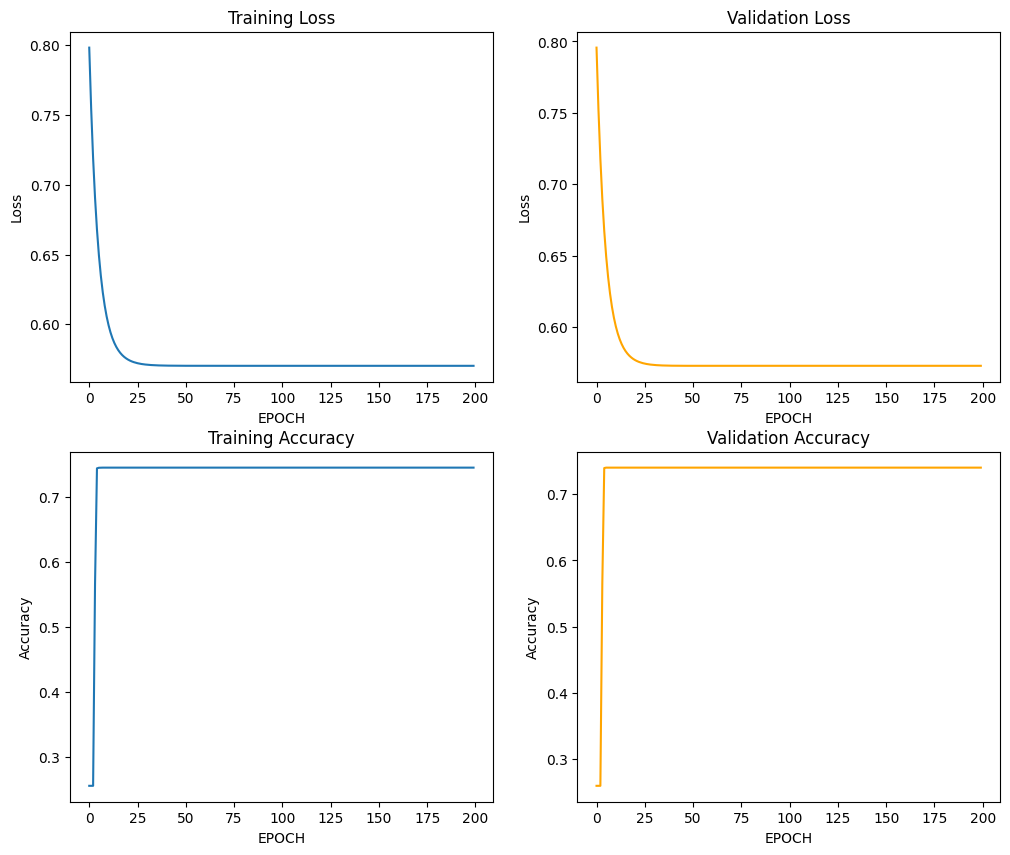

In [72]:
fig,ax = plt.subplots(2,2,figsize=(12,10))
ax[0,0].plot(train_losses)
ax[0,0].set(xlabel="EPOCH",ylabel="Loss")
ax[0,0].set_title("Training Loss")

ax[0,1].plot(val_losses,"orange")
ax[0,1].set(xlabel="EPOCH",ylabel="Loss")
ax[0,1].set_title("Validation Loss")

ax[1,0].plot(train_accs)
ax[1,0].set(xlabel="EPOCH",ylabel="Accuracy")
ax[1,0].set_title("Training Accuracy")

ax[1,1].plot(val_accs,"orange")
ax[1,1].set(xlabel="EPOCH",ylabel="Accuracy")
ax[1,1].set_title("Validation Accuracy")

**Evaluation**

In [70]:
val_set_acc = compute_accuracy(X_val,y_val,theta)
test_set_acc = compute_accuracy(X_test,y_test,theta)
print("Evaulation on validation and test set:")
print(f"Accuracy: {val_set_acc}")
print(f"Accuracy: {test_set_acc}")

Evaulation on validation and test set:
Accuracy: 0.73989898989899
Accuracy: 0.7512626262626263


# Questions

In [74]:
# Question 13:
X = np.array([[22.3,-1.5,1.1,1]])
theta = np.array([0.1,-0.15,0.3,-0.2])
print(predict(X,theta))

[0.92988994]


In [75]:
# Question 14
y = np.array([1,0,0,1])
y_hat = np.array([0.8,0.75,0.3,0.95])
print(compute_loss(y_hat,y))

0.5043515376900958


In [82]:
# Question 16
X =np.array([[1,2],[2,1],[1,1],[2,2]])
y_true = np.array([0,1,0,1])
y_pred = np.array([0.25,0.75,0.4,0.8])
print(compute_gradient(X,y_true,y_hat))

[0.125  0.3875]


In [77]:
# Question 17
def compute_accuracy (y_true , y_pred ) :
 y_pred_rounded = np. round ( y_pred )
 accuracy = np. mean ( y_true == y_pred_rounded )

 return accuracy
y_true = [1,0,1,1]
y_pred = [0.85,0.35,0.9,0.75]
print(compute_accuracy(y_true,y_pred))

1.0


In [81]:
# Question 18
def compute_gradient (X, y_true , y_pred ) :
 gradient = np. dot (X.T, ( y_pred - y_true ) ) / y_true.size

 return gradient
X = np.array([[1,3],[2,1],[3,2],[1,2]])
y_true = np.array([1,0,1,1])
y_pred = np.array([0.7,0.4,0.6,0.85])
print(compute_gradient(X,y_true,y_pred))


[-0.2125 -0.4   ]
